In [33]:
from PIL import Image
from os import listdir
from os.path import isfile, join
import time
import numpy as np
import matplotlib.pyplot as plt
import pywt
import scipy.signal
import wavio
from numpy.fft import rfft, rfftfreq
from utils import load_data, wavelet, filter_mean, imshow, print_imgs, filter_highpass

START = 19
END = 20

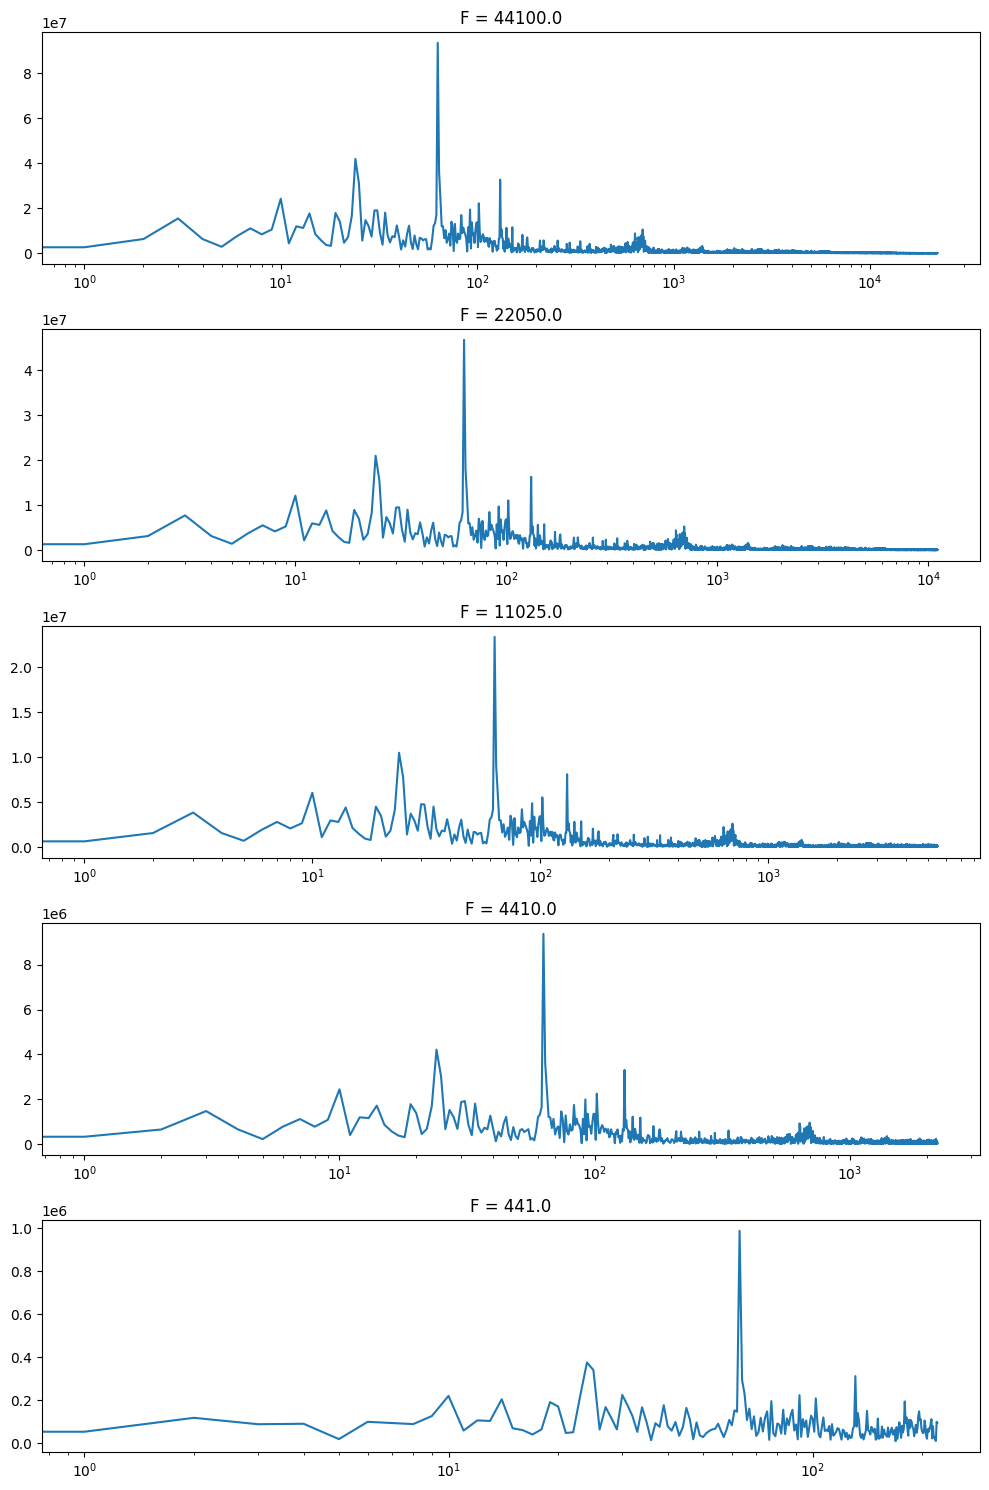

In [34]:
F, signal = load_data()
signal = signal[START*F:END*F]

def divide(factor):
    mask = np.arange(stop = len(signal)) % factor == 0
    signal_d = signal[mask]
    F_d = F / factor
    return F_d, signal_d

def plot_fft(ax, factor):
    F_d, signal_d = divide(factor)
    ax.semilogx(rfftfreq(len(signal_d), 1.0/F_d), np.abs(rfft(signal_d)))
    # ax.set_yscale('log')
    # axs[0].set_xlabel("Frequency (Hz)")
    ax.set_title(f"F = {F_d}")

figsize = (10, 15)
fig, axs = plt.subplots(5, 1, figsize=figsize)
plot_fft(axs[0], 1)
plot_fft(axs[1], 2)
plot_fft(axs[2], 4)
plot_fft(axs[3], 10)
plot_fft(axs[4], 100)
plt.tight_layout()